### NBA player Position Prediction / Season 2022

In [55]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular

### 1- Web Scraping

In [57]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_totals.html'
req = requests.get(url)
print(req)

<Response [200]>


In [58]:
soup = BeautifulSoup(req.content, 'html.parser')

In [59]:
tabela = soup.find(name='table')

In [60]:
df = pd.read_html(str(tabela))[0]
df.head(5)

Rk             Player Pos Age   Tm   G  GS    MP   FG  FGA  ...   FT%  ORB  \
0  1   Precious Achiuwa   C  22  TOR  73  28  1725  265  603  ...  .595  146   
1  2       Steven Adams   C  28  MEM  76  75  1999  210  384  ...  .543  349   
2  3        Bam Adebayo   C  24  MIA  56  56  1825  406  729  ...  .753  137   
3  4       Santi Aldama  PF  21  MEM  32   0   360   53  132  ...  .625   33   
4  5  LaMarcus Aldridge   C  36  BRK  47  12  1050  252  458  ...  .873   73   

   DRB  TRB  AST STL BLK  TOV   PF   PTS  
0  327  473   82  37  41   84  151   664  
1  411  760  256  65  60  115  153   528  
2  427  564  190  80  44  148  171  1068  
3   54   87   21   6  10   16   36   132  
4  185  258   42  14  47   44   78   607  

[5 rows x 30 columns]

In [61]:
df.to_csv('NBAPlayersStats.csv')

### 2- Data Cleaning &  Visualization

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      842 non-null    object
 1   Player  842 non-null    object
 2   Pos     842 non-null    object
 3   Age     842 non-null    object
 4   Tm      842 non-null    object
 5   G       842 non-null    object
 6   GS      842 non-null    object
 7   MP      842 non-null    object
 8   FG      842 non-null    object
 9   FGA     842 non-null    object
 10  FG%     827 non-null    object
 11  3P      842 non-null    object
 12  3PA     842 non-null    object
 13  3P%     770 non-null    object
 14  2P      842 non-null    object
 15  2PA     842 non-null    object
 16  2P%     814 non-null    object
 17  eFG%    827 non-null    object
 18  FT      842 non-null    object
 19  FTA     842 non-null    object
 20  FT%     745 non-null    object
 21  ORB     842 non-null    object
 22  DRB     842 non-null    ob

In [63]:
df.dropna(inplace=True)

In [64]:
df.drop_duplicates(inplace=True)

In [65]:
i = df[(df.Rk == 'Rk')].index

In [66]:
df.drop(i,inplace=True)

In [67]:
df['Rk']=df['Rk'].astype(int)
df['Age']=df['Age'].astype(int)
df['G']=df['G'].astype(int)
df['GS']=df['GS'].astype(int)
df['MP']=df['MP'].astype(float)
df['FG']=df['FG'].astype(float)
df['FGA']=df['FGA'].astype(float)
df['FG%']=df['FG%'].astype(float)
df['3P']=df['3P'].astype(float)
df['3PA']=df['3PA'].astype(float)
df['3P%']=df['3P%'].astype(float)
df['2P']=df['2P'].astype(float)
df['TRB']=df['TRB'].astype(float)
df['2PA']=df['2PA'].astype(float)
df['2P%']=df['2P%'].astype(float)
df['eFG%']=df['eFG%'].astype(float)
df['FT']=df['FT'].astype(float)
df['FTA']=df['FTA'].astype(float)
df['FT%']=df['FT%'].astype(float)
df['DRB']=df['DRB'].astype(float)
df['ORB']=df['ORB'].astype(float)
df['AST']=df['AST'].astype(float)
df['STL']=df['STL'].astype(float)
df['BLK']=df['BLK'].astype(float)
df['TOV']=df['TOV'].astype(float)
df['PF']=df['PF'].astype(float)
df['PTS']=df['PTS'].astype(float)



In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 840
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      672 non-null    int64  
 1   Player  672 non-null    object 
 2   Pos     672 non-null    object 
 3   Age     672 non-null    int64  
 4   Tm      672 non-null    object 
 5   G       672 non-null    int64  
 6   GS      672 non-null    int64  
 7   MP      672 non-null    float64
 8   FG      672 non-null    float64
 9   FGA     672 non-null    float64
 10  FG%     672 non-null    float64
 11  3P      672 non-null    float64
 12  3PA     672 non-null    float64
 13  3P%     672 non-null    float64
 14  2P      672 non-null    float64
 15  2PA     672 non-null    float64
 16  2P%     672 non-null    float64
 17  eFG%    672 non-null    float64
 18  FT      672 non-null    float64
 19  FTA     672 non-null    float64
 20  FT%     672 non-null    float64
 21  ORB     672 non-null    float64
 22  DR

In [69]:
df['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'PG-SG', 'SF-SG',
       'PF-SF', 'C-PF', 'PF-C', 'SG-PG-SF'], dtype=object)

In [70]:
df.replace(to_replace=['SG-PG','SG-SF','SG-PG-SF'],value='SG',inplace=True)
df.replace(to_replace='PG-SG',value='PG',inplace=True)
df.replace(to_replace='SF-SG',value='SF',inplace=True)
df.replace(to_replace=['PF-SF','PF-C'],value='PF',inplace=True)
df.replace(to_replace='C-PF',value='C',inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


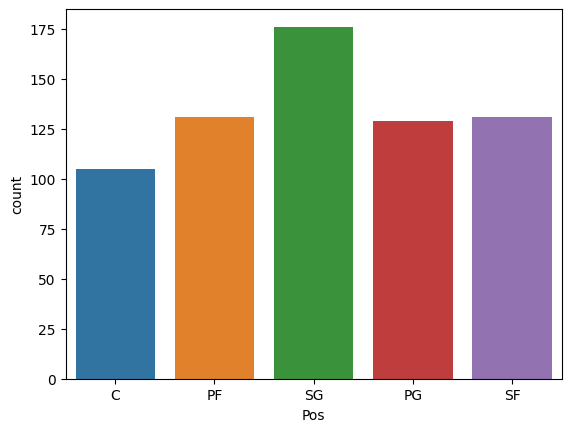

In [71]:
sns.countplot(df['Pos'],label="Count")
plt.show()

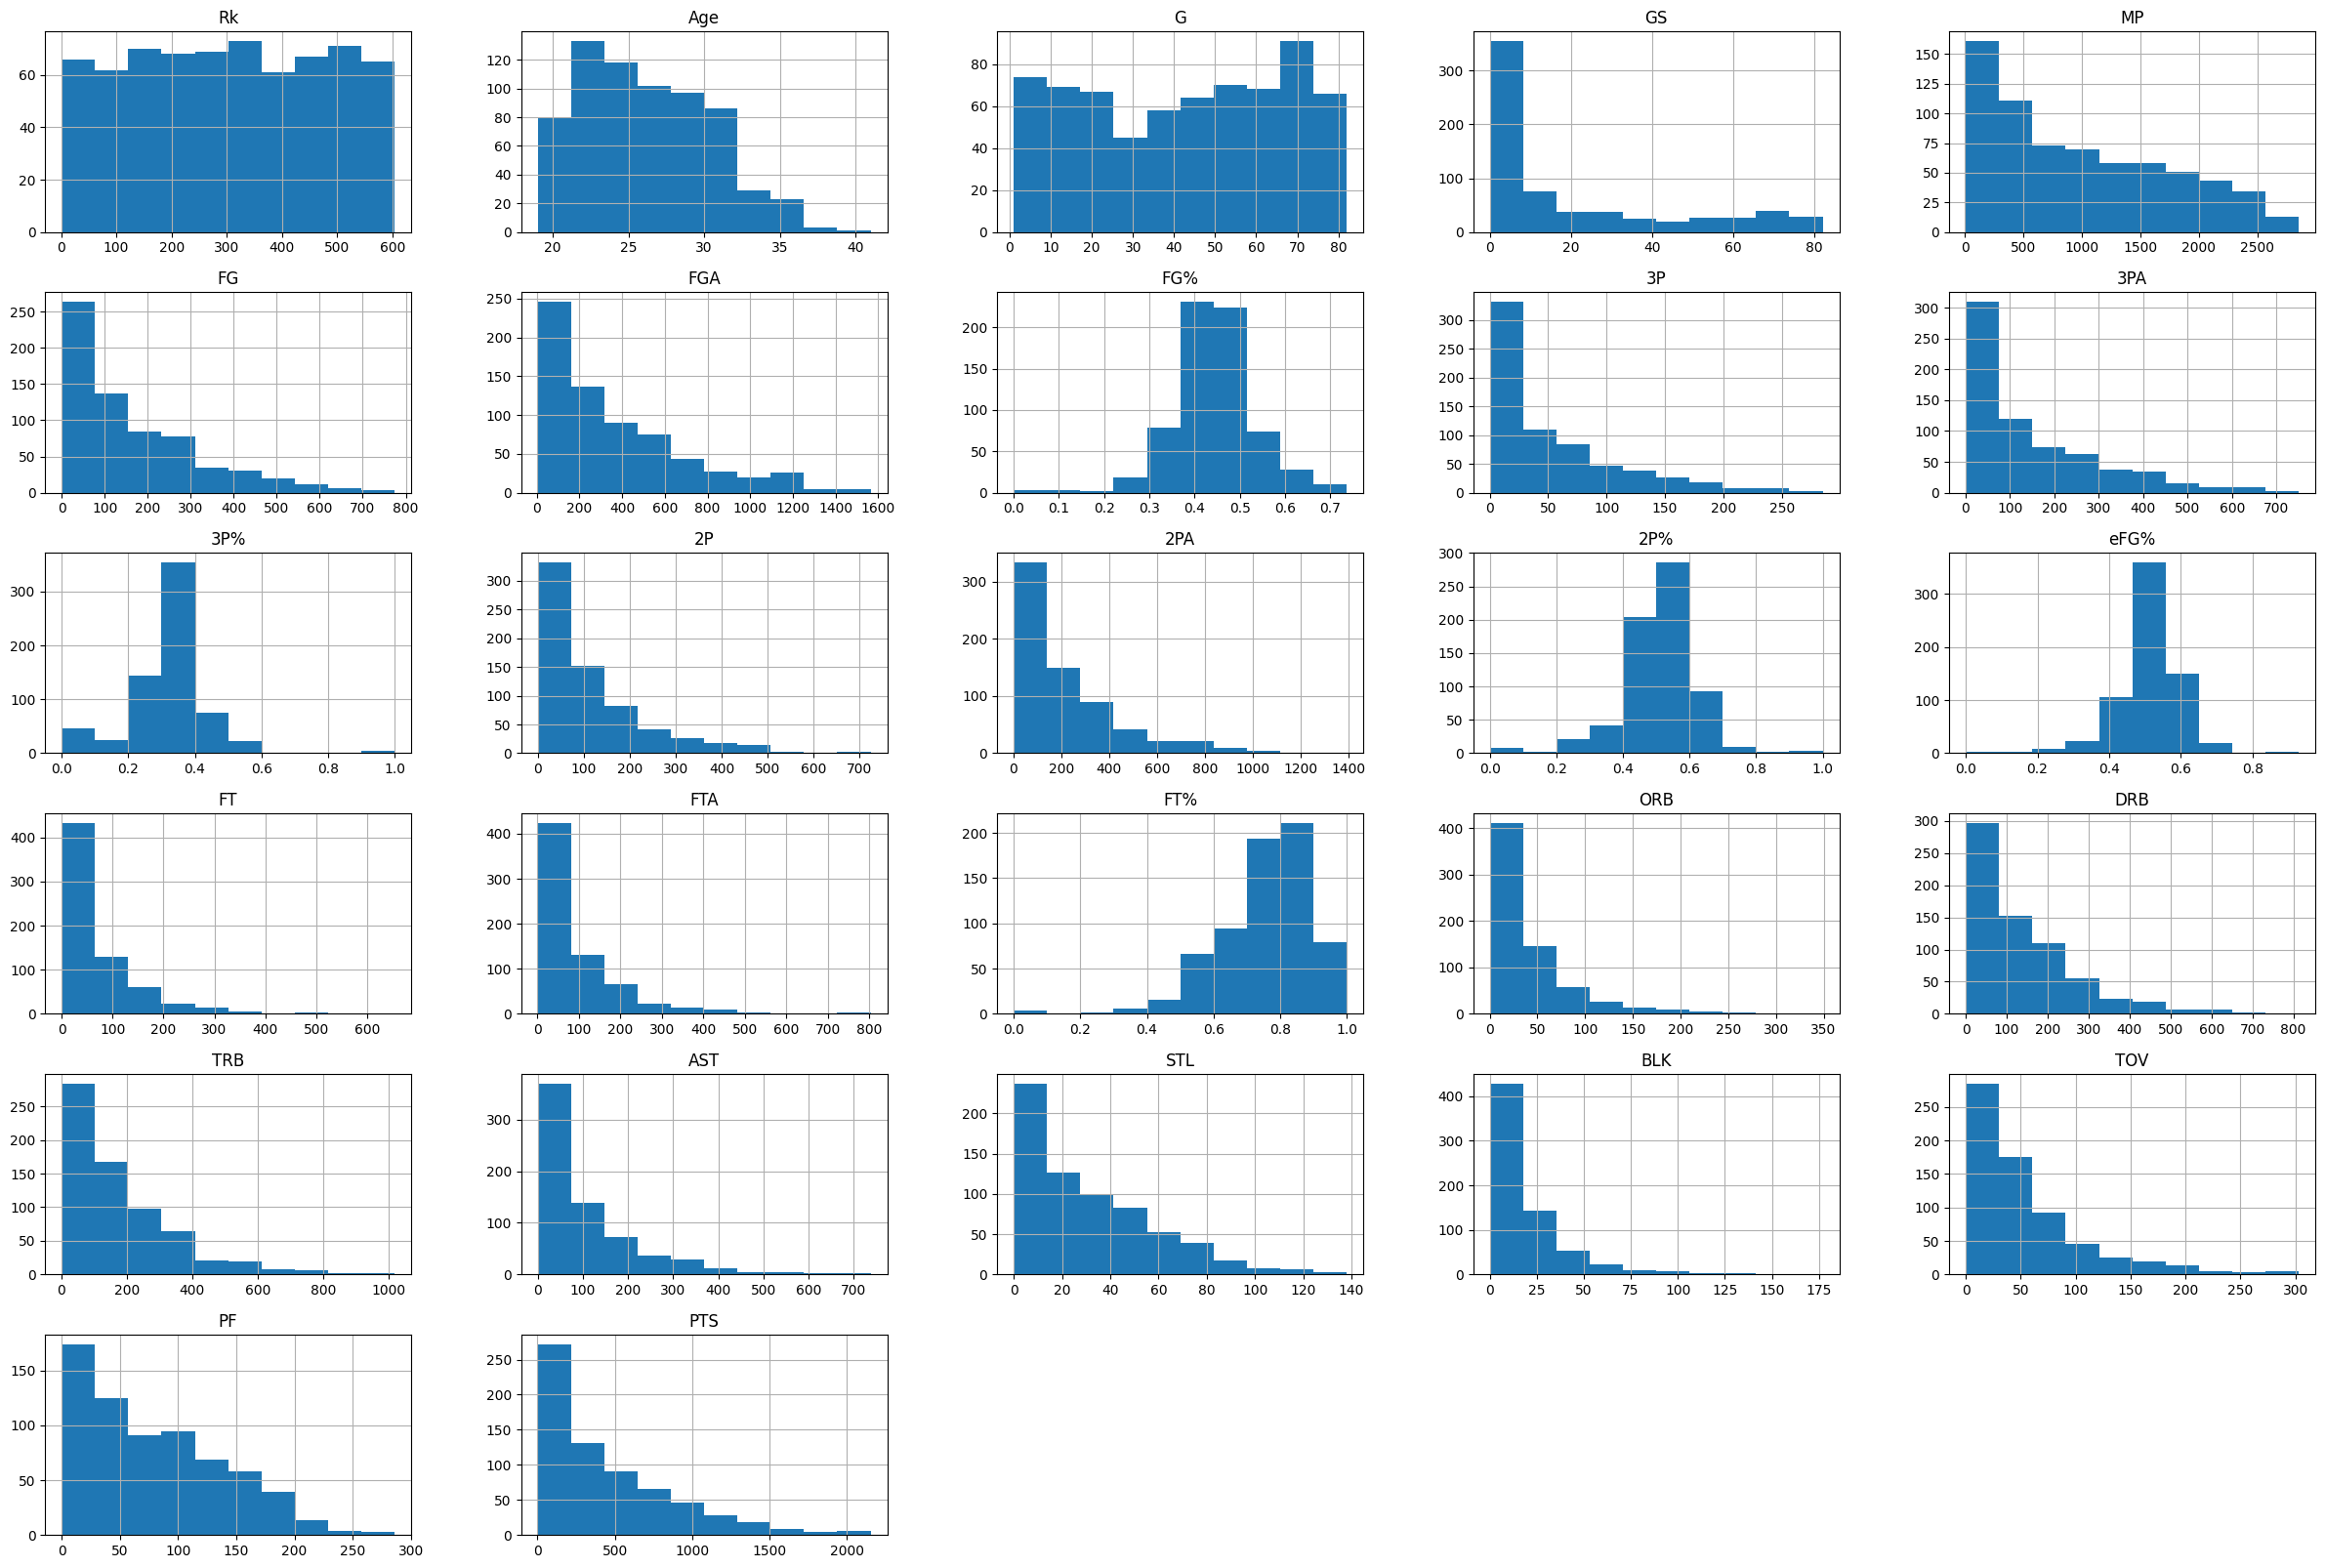

In [72]:
df.hist(figsize=(30,20))
plt.show()

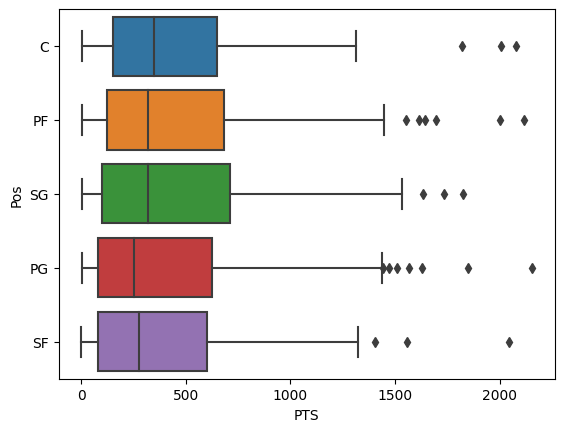

In [73]:
sns.boxplot(x="PTS",y="Pos",data=df)

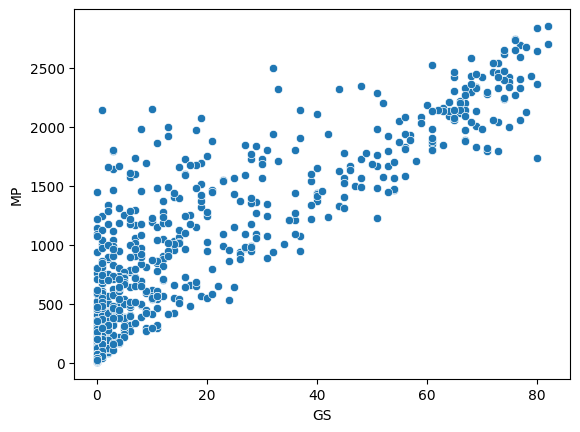

In [74]:
sns.scatterplot(x="GS",y="MP",data=df)

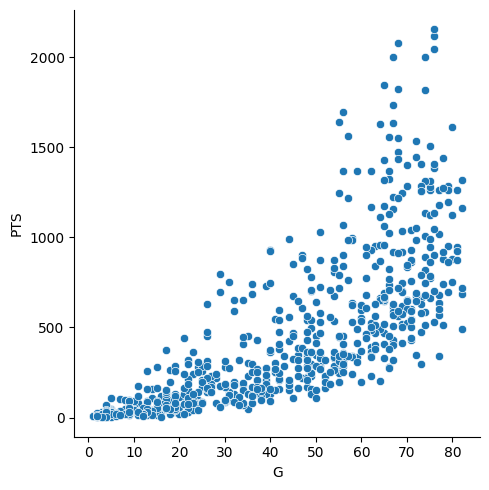

In [75]:
sns.relplot(x="G",y="PTS",data=df)

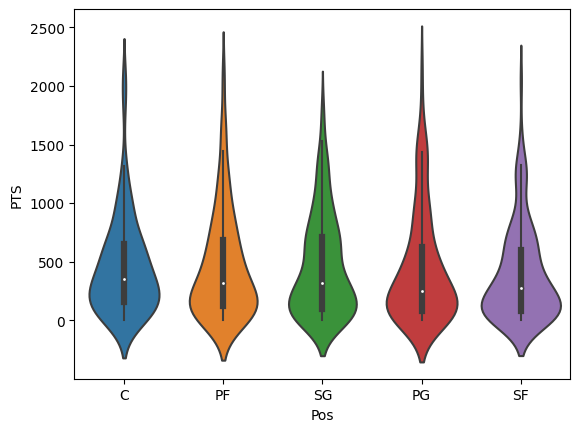

In [76]:
sns.violinplot(x="Pos",y="PTS",data=df)

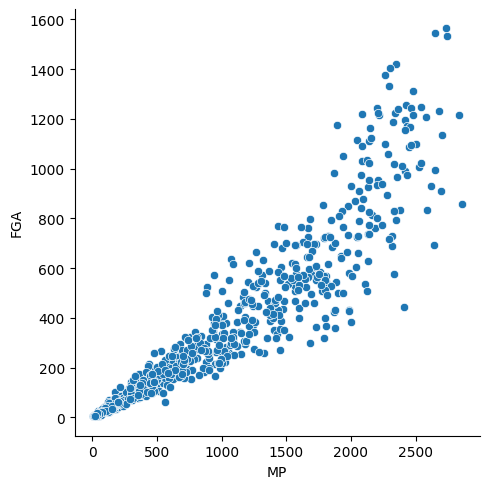

In [77]:
sns.relplot(x="MP",y="FGA",data=df)

<Figure size 1000x1000 with 0 Axes>

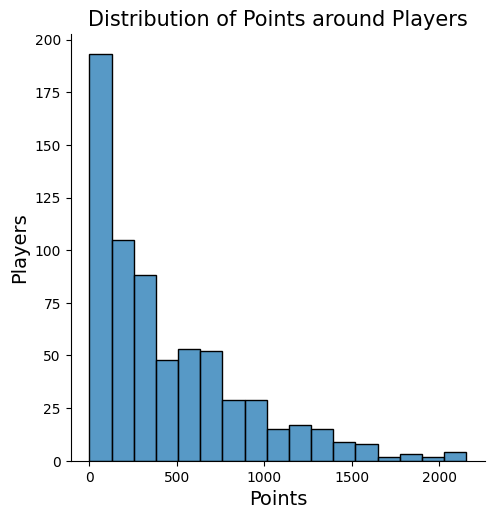

In [78]:
plt.figure(figsize=(10,10))
plt.style.use("default")
sns.displot(df["PTS"])   
plt.title("Distribution of Points around Players",fontsize=15)
plt.xlabel("Points",fontsize=14)
plt.ylabel("Players",fontsize=14)
plt.show()

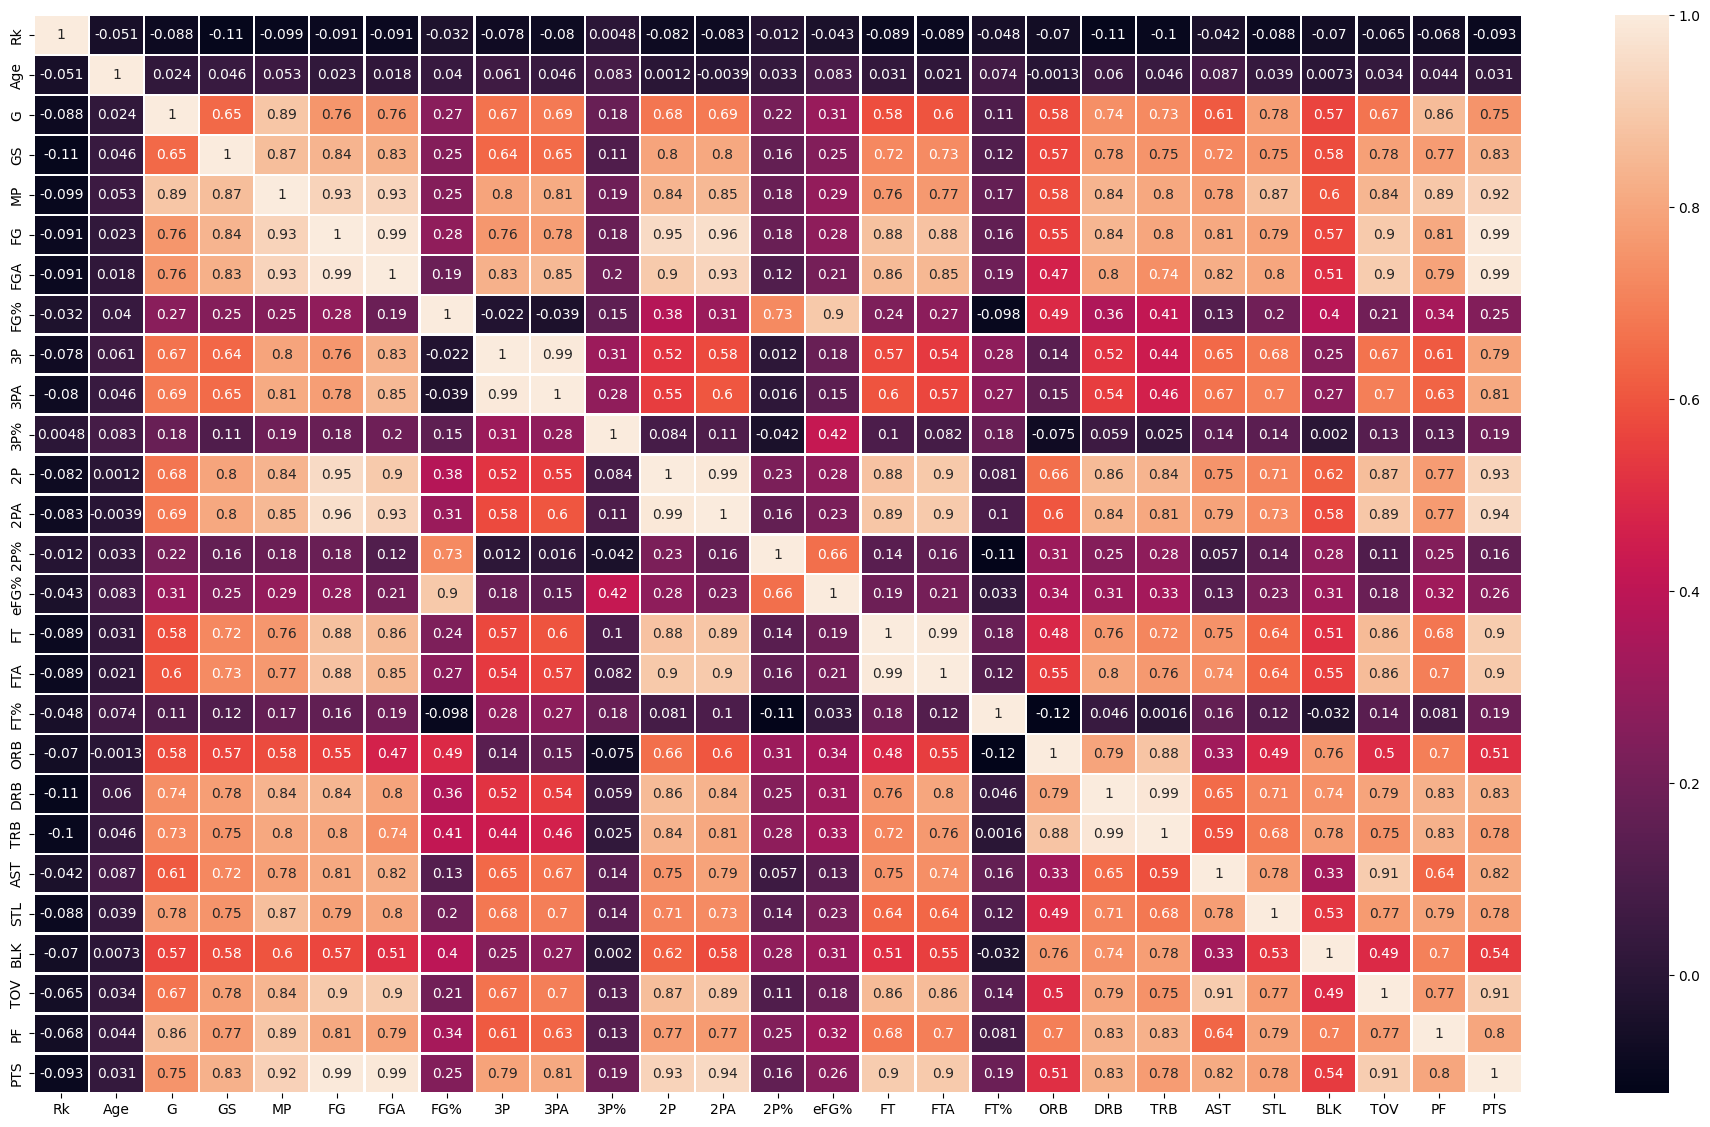

In [79]:
plt.figure(figsize = (24, 14))

corr = df.corr()
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

### 3- Machine Learning Algorithm

In [80]:
df=df.drop(['Rk','Tm','Player','G','GS','MP','FG','FGA','3P','3PA','2P','2PA','FT','FTA'],axis=1)

In [81]:
list_1=list(df['Pos'])

In [82]:
le=LabelEncoder()

In [83]:
df['Pos']=le.fit_transform(df['Pos'])

In [84]:
y=df['Pos']
x=df.drop('Pos',axis=1)

In [104]:
x.head()

Age    FG%    3P%    2P%   eFG%    FT%    ORB    DRB    TRB    AST   STL  \
0   22  0.439  0.359  0.468  0.486  0.595  146.0  327.0  473.0   82.0  37.0   
1   28  0.547  0.000  0.548  0.547  0.543  349.0  411.0  760.0  256.0  65.0   
2   24  0.557  0.000  0.562  0.557  0.753  137.0  427.0  564.0  190.0  80.0   
3   21  0.402  0.125  0.560  0.424  0.625   33.0   54.0   87.0   21.0   6.0   
4   36  0.550  0.304  0.578  0.566  0.873   73.0  185.0  258.0   42.0  14.0   

    BLK    TOV     PF     PTS  
0  41.0   84.0  151.0   664.0  
1  60.0  115.0  153.0   528.0  
2  44.0  148.0  171.0  1068.0  
3  10.0   16.0   36.0   132.0  
4  47.0   44.0   78.0   607.0

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

### Extra Trees Classifier

In [86]:
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)


ExtraTreesClassifier(random_state=0)

In [87]:
y_pred=etc.predict(x_test)
conf =print(confusion_matrix(y_test, y_pred))
clf =print(classification_report(y_test, y_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)

[[16  3  0  5  0]
 [ 7 17  0  8  5]
 [ 0  0 21  1 11]
 [ 2  5  1 11 11]
 [ 1  5  7  5 26]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.64        24
           1       0.57      0.46      0.51        37
           2       0.72      0.64      0.68        33
           3       0.37      0.37      0.37        30
           4       0.49      0.59      0.54        44

    accuracy                           0.54       168
   macro avg       0.55      0.54      0.55       168
weighted avg       0.55      0.54      0.54       168

Training Score:
 100.0


In [88]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5416666666666666


In [105]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data.head()

Actual  Predicted
729       3          1
386       1          1
14        1          1
806       4          4
87        3          4

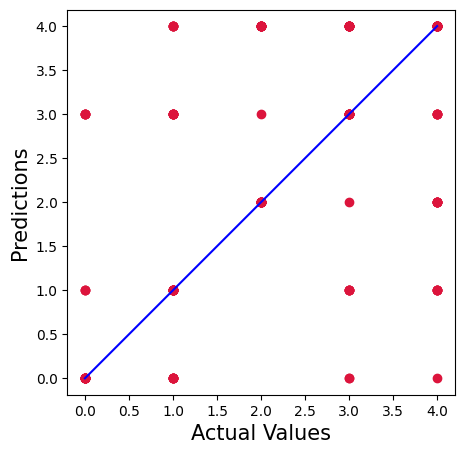

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(data.Actual, data.Predicted, c='crimson')

p1 = max(max(data.Predicted), max(data.Actual))
p2 = min(min(data.Predicted), min(data.Actual))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

###  4 - Explainable Artificial Intelligence (LIME)

In [91]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train.values, feature_names=x_train.columns.values.tolist(),
                                                  class_names=['Pos'], verbose=True, mode='regression')

Select 5th instance


In [92]:
j = 5
exp = explainer.explain_instance(x_test.values[j], etc.predict, num_features=15)

Intercept 2.2035793913742223
Prediction_local [1.86321769]
Right: 4


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
exp.show_in_notebook(show_table=True)

In [94]:
exp.as_list()

[('ORB > 55.00', -1.2090000451930165),
 ('BLK > 23.00', -0.7652220022058785),
 ('STL > 46.00', 0.7120541659707971),
 ('TRB > 254.50', -0.5380997403272897),
 ('PTS > 674.50', 0.5088318194636999),
 ('TOV > 73.00', 0.30919766428337253),
 ('DRB > 197.25', -0.3050066323207351),
 ('Age <= 23.00', 0.2429835902416187),
 ('0.40 < FG% <= 0.44', 0.23423141578058365),
 ('PF > 116.50', 0.21104601884918658),
 ('0.33 < 3P% <= 0.38', 0.16898976532368712),
 ('0.77 < FT% <= 0.85', 0.15148929654499596),
 ('AST > 139.50', -0.10883240179944972),
 ('0.52 < eFG% <= 0.56', 0.0521863376478582),
 ('0.52 < 2P% <= 0.57', -0.005210957257481273)]

Select 10th instance

In [95]:
j = 10
exp = explainer.explain_instance(x_test.values[j], etc.predict, num_features=15)

Intercept 2.128658914461113
Prediction_local [2.01625353]
Right: 3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [96]:
exp.show_in_notebook(show_table=True)

In [97]:
exp.as_list()

[('BLK > 23.00', -0.7797567303274608),
 ('FG% > 0.49', -0.5642254213440442),
 ('PTS > 674.50', 0.5245456374102986),
 ('Age > 29.00', -0.3368509278898844),
 ('59.00 < AST <= 139.50', 0.26813099128907086),
 ('PF > 116.50', 0.2158495096504009),
 ('0.77 < FT% <= 0.85', 0.12401578826857235),
 ('0.28 < 3P% <= 0.33', 0.09423039419222903),
 ('24.00 < STL <= 46.00', 0.09415533013575021),
 ('99.00 < DRB <= 197.25', 0.08463598080531512),
 ('2P% > 0.57', 0.07945658239445529),
 ('38.00 < TOV <= 73.00', 0.06669514483544563),
 ('eFG% > 0.56', -0.05119069887435255),
 ('129.50 < TRB <= 254.50', 0.04447092589888559),
 ('26.00 < ORB <= 55.00', 0.023432108074217743)]

Select 15th instance

In [98]:
j = 15
exp = explainer.explain_instance(x_test.values[j], etc.predict, num_features=15)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


Intercept 1.985577333668676
Prediction_local [2.49716275]
Right: 4


In [99]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [100]:
exp.as_list()

[('ORB <= 9.00', 0.7544053809372627),
 ('STL <= 7.75', -0.5950567613659001),
 ('3P% <= 0.28', -0.4398937166558115),
 ('BLK <= 3.00', 0.42218172894530087),
 ('FG% <= 0.40', 0.40255039115148433),
 ('PTS <= 92.50', -0.36607705704455135),
 ('TRB <= 43.00', 0.35842715230960936),
 ('FT% > 0.85', 0.2605233304024858),
 ('PF <= 25.75', -0.2305241611171914),
 ('AST <= 18.00', -0.22280806200081227),
 ('Age <= 23.00', 0.21686776997889945),
 ('TOV <= 12.00', -0.15311487680283195),
 ('DRB <= 33.00', 0.13485905123043243),
 ('eFG% <= 0.48', -0.059938541867070275),
 ('0.46 < 2P% <= 0.52', 0.02918379256606235)]

Select 20th instance

In [101]:
j = 20
exp = explainer.explain_instance(x_test.values[j], etc.predict, num_features=15)

Intercept 2.2008437702117996
Prediction_local [2.06936984]
Right: 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [102]:
# Show the predictions
exp.show_in_notebook(show_table=True)

In [103]:
exp.as_list()

[('92.50 < PTS <= 302.00', -0.3059189228290235),
 ('25.75 < PF <= 67.00', -0.19291702329397561),
 ('24.00 < STL <= 46.00', 0.161678532229826),
 ('0.69 < FT% <= 0.77', -0.14342249849801952),
 ('26.00 < Age <= 29.00', 0.14002724596772617),
 ('0.28 < 3P% <= 0.33', 0.10774048160153582),
 ('99.00 < DRB <= 197.25', 0.08786624175579744),
 ('0.44 < FG% <= 0.49', -0.07997963266839064),
 ('11.50 < BLK <= 23.00', 0.07514997221711543),
 ('129.50 < TRB <= 254.50', 0.04314484834217356),
 ('12.00 < TOV <= 38.00', -0.034088226096160676),
 ('18.00 < AST <= 59.00', 0.026152568037133825),
 ('0.52 < eFG% <= 0.56', -0.013137602593143883),
 ('0.52 < 2P% <= 0.57', -0.0046957950249202525),
 ('26.00 < ORB <= 55.00', 0.0009258854802720535)]